# Import Libraries and Datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Note: Hourly consumption data is ingested for annual periods of 2015-2021

In [3]:
df1 = pd.read_csv('GercekZamanliUretim-01012021-31122021.csv', encoding='cp1254')
df2 = pd.read_csv('GercekZamanliUretim-01012020-31122020.csv', encoding='cp1254')
df3 = pd.read_csv('GercekZamanliUretim-01012019-31122019.csv', encoding='cp1254')
df4 = pd.read_csv('GercekZamanliUretim-01012018-31122018.csv', encoding='cp1254')
df5 = pd.read_csv('GercekZamanliUretim-01012017-31122017.csv', encoding='cp1254')
df6 = pd.read_csv('GercekZamanliUretim-01012016-31122016.csv', encoding='cp1254')
df7 = pd.read_csv('GercekZamanliUretim-01012015-31122015.csv', encoding='cp1254')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df = df.reset_index(drop=True)

In [4]:
df.head()

,Tarih,Saat,Toplam (MWh),Doğal Gaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeotermal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Atık Isı
0,01.01.2021,00:00,"29.489,46","7.083,97","1.551,39","5.256,89","686,07","7.673,92","4.836,19","0,00","33,20","1.238,01","218,59","603,87","578,72","0,00","0,00","-364,20","92,84"
1,01.01.2021,01:00,"28.067,11","6.072,81","1.387,63","5.121,95","703,90","7.530,56","4.826,45","0,00","34,00","1.244,05","223,00","599,09","577,04","0,00","0,00","-346,00","92,63"
2,01.01.2021,02:00,"26.527,08","4.878,19","1.507,96","5.110,55","667,26","6.979,91","4.750,11","0,00","30,30","1.246,75","223,00","603,49","581,60","0,00","0,00","-142,00","89,96"
3,01.01.2021,03:00,"25.327,19","4.394,61","1.652,86","5.029,12","651,91","6.536,85","4.432,18","0,00","30,80","1.248,66","220,79","603,81","579,64","0,00","0,00","-145,00","90,96"
4,01.01.2021,04:00,"24.719,72","4.191,38","1.615,38","5.012,93","670,94","6.266,92","4.321,98","0,00","31,40","1.246,97","220,80","602,66","583,37","0,00","0,00","-137,00","91,99"


## Column Names are in Turkish - translate to English

In [5]:
df.rename(columns = {'Tarih':'Date', 
                     'Saat':'Hour', 
                     'Toplam (MWh)': 'Production (MWh)',
                     'Doğal Gaz': 'Natural Gas',
                     'Barajlı':'Hydro (Dams)',
                     'Linyit':'Coal - Lignite', 
                     'Akarsu':'Hydro (Free Flowing)', 
                     'İthal Kömür':'Coal - Imported',
                     'Rüzgar':'Wind', 
                     'Güneş': 'Solar', 
                     'Jeotermal':'Geothermal', 
                     'Asfaltit Kömür':'Coal - Asphaltite', 
                     'Taş Kömür':'Anthracite', 
                     'Biyokütle':'Biomass'}, inplace = True)

In [6]:
df.head()

,Date,Hour,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
0,01.01.2021,00:00,"29.489,46","7.083,97","1.551,39","5.256,89","686,07","7.673,92","4.836,19","0,00","33,20","1.238,01","218,59","603,87","578,72","0,00","0,00","-364,20","92,84"
1,01.01.2021,01:00,"28.067,11","6.072,81","1.387,63","5.121,95","703,90","7.530,56","4.826,45","0,00","34,00","1.244,05","223,00","599,09","577,04","0,00","0,00","-346,00","92,63"
2,01.01.2021,02:00,"26.527,08","4.878,19","1.507,96","5.110,55","667,26","6.979,91","4.750,11","0,00","30,30","1.246,75","223,00","603,49","581,60","0,00","0,00","-142,00","89,96"
3,01.01.2021,03:00,"25.327,19","4.394,61","1.652,86","5.029,12","651,91","6.536,85","4.432,18","0,00","30,80","1.248,66","220,79","603,81","579,64","0,00","0,00","-145,00","90,96"
4,01.01.2021,04:00,"24.719,72","4.191,38","1.615,38","5.012,93","670,94","6.266,92","4.321,98","0,00","31,40","1.246,97","220,80","602,66","583,37","0,00","0,00","-137,00","91,99"


In [7]:
df.describe()

,Date,Hour,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
count,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365,61365
unique,2557,24,60392,60014,59517,54840,55989,57478,57560,11456,4990,44471,1138,16006,33643,1,425,18579,9312
top,01.01.2021,00:00,"32.510,26","12.145,18","3.842,69","4.703,41","1.133,47","4.244,00","721,44","0,00","36,20","333,13","134,68","339,50","165,53","0,00","0,00","0,00","88,06"
freq,24,2557,3,3,3,5,6,5,5,35579,381,9,3064,535,14,61365,44910,27506,27


In [8]:
# Check null values
df.isnull().sum()

Date                    0
Hour                    0
Production (MWh)        0
Natural Gas             0
Hydro (Dams)            0
Coal - Lignite          0
Hydro (Free Flowing)    0
Coal - Imported         0
Wind                    0
Solar                   0
Fuel Oil                0
Geothermal              0
Coal - Asphaltite       0
Anthracite              0
Biomass                 0
Nafta                   0
LNG                     0
Uluslararası            0
Atık Isı                0
dtype: int64

## Split the data into training, testing, and validation datasets using a 70% split

In [9]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [10]:
train_df.head()

,Date,Hour,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
0,01.01.2021,00:00,"29.489,46","7.083,97","1.551,39","5.256,89","686,07","7.673,92","4.836,19","0,00","33,20","1.238,01","218,59","603,87","578,72","0,00","0,00","-364,20","92,84"
1,01.01.2021,01:00,"28.067,11","6.072,81","1.387,63","5.121,95","703,90","7.530,56","4.826,45","0,00","34,00","1.244,05","223,00","599,09","577,04","0,00","0,00","-346,00","92,63"
2,01.01.2021,02:00,"26.527,08","4.878,19","1.507,96","5.110,55","667,26","6.979,91","4.750,11","0,00","30,30","1.246,75","223,00","603,49","581,60","0,00","0,00","-142,00","89,96"
3,01.01.2021,03:00,"25.327,19","4.394,61","1.652,86","5.029,12","651,91","6.536,85","4.432,18","0,00","30,80","1.248,66","220,79","603,81","579,64","0,00","0,00","-145,00","90,96"
4,01.01.2021,04:00,"24.719,72","4.191,38","1.615,38","5.012,93","670,94","6.266,92","4.321,98","0,00","31,40","1.246,97","220,80","602,66","583,37","0,00","0,00","-137,00","91,99"


In [11]:
train_df.shape

(42955, 19)

In [12]:
val_df.head()

,Date,Hour,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
42955,25.11.2017,19:00,"37.312,71","18.588,22","3.319,02","4.774,01","1.117,55","7.019,47","896,56","0,00","146,70","731,34","273,78","161,50","232,66","0,00","0,00","0,00","51,90"
42956,25.11.2017,20:00,"36.483,99","18.956,02","2.182,61","4.783,14","1.020,87","7.017,43","920,45","0,00","148,70","731,86","273,78","161,50","231,21","0,00","0,00","0,00","56,42"
42957,25.11.2017,21:00,"35.515,17","18.209,77","1.858,24","4.755,78","1.077,95","7.014,17","982,89","0,00","148,70","734,17","275,99","170,50","231,37","0,00","0,00","0,00","55,64"
42958,25.11.2017,22:00,"34.966,65","17.901,47","1.718,56","4.745,29","925,20","7.012,19","1.053,08","0,00","150,80","739,34","271,57","165,00","230,25","0,00","0,00","0,00","53,90"
42959,25.11.2017,23:00,"33.023,09","17.247,06","940,64","4.141,15","859,09","6.988,33","1.214,02","0,00","151,80","762,53","275,99","166,50","225,12","0,00","0,00","0,00","50,86"


In [13]:
val_df.shape

(12273, 19)

In [14]:
test_df.head()

,Date,Hour,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
55228,20.04.2015,07:00,"24.089,67","7.936,90","5.224,52","1.596,83","4.259,18","3.070,90","758,42","0,00","279,80","340,37","108,19","341,00","129,00","0,00","9,40","0,00","35,16"
55229,20.04.2015,08:00,"28.965,74","9.866,63","7.315,60","1.633,71","4.688,28","3.461,80","742,30","0,00","292,30","335,37","123,06","333,50","127,94","0,00","9,40","0,00","35,85"
55230,20.04.2015,09:00,"31.636,64","11.338,36","8.243,60","1.798,39","4.783,01","3.607,80","598,87","0,00","299,10","321,03","136,89","333,50","132,33","0,00","9,40","0,00","34,36"
55231,20.04.2015,10:00,"32.406,91","11.715,46","8.402,33","1.958,22","4.816,67","3.665,70","557,06","0,00","301,90","329,81","134,68","348,50","134,86","0,00","9,40","0,00","32,32"
55232,20.04.2015,11:00,"32.888,42","11.793,74","8.879,04","2.048,24","4.753,34","3.657,76","477,30","0,00","309,80","327,64","136,89","331,50","128,36","0,00","9,40","0,00","35,41"


In [15]:
test_df.shape

(6137, 19)

## Reformat the 'Date' column, and the numeric values in all columns to replace ',' with '.'

In [16]:
df['Date'] =pd.to_datetime(df['Date'] +' '+ df['Hour'], format='%d.%m.%Y %H:%M')

In [17]:
df = df.drop('Hour', axis = 1)

In [18]:
df.to_csv('turkey_electricity_production.csv')

In [19]:
#df['Production (MWh)'] = df['Production (MWh)'].str.replace(',','')
df['Production (MWh)'] = pd.to_numeric(df['Production (MWh)'])
df

ValueError: Unable to parse string "29.489,46" at position 0

In [20]:
df = df.sort_values('Date')

In [79]:
df.head()

,Date,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
0,2021-01-01 00:00:00,29.48946,"7.083,97","1.551,39","5.256,89","686,07","7.673,92","4.836,19","0,00","33,20","1.238,01","218,59","603,87","578,72","0,00","0,00","-364,20","92,84"
1,2021-01-01 01:00:00,28.06711,"6.072,81","1.387,63","5.121,95","703,90","7.530,56","4.826,45","0,00","34,00","1.244,05","223,00","599,09","577,04","0,00","0,00","-346,00","92,63"
2,2021-01-01 02:00:00,26.52708,"4.878,19","1.507,96","5.110,55","667,26","6.979,91","4.750,11","0,00","30,30","1.246,75","223,00","603,49","581,60","0,00","0,00","-142,00","89,96"
3,2021-01-01 03:00:00,25.32719,"4.394,61","1.652,86","5.029,12","651,91","6.536,85","4.432,18","0,00","30,80","1.248,66","220,79","603,81","579,64","0,00","0,00","-145,00","90,96"
4,2021-01-01 04:00:00,24.71972,"4.191,38","1.615,38","5.012,93","670,94","6.266,92","4.321,98","0,00","31,40","1.246,97","220,80","602,66","583,37","0,00","0,00","-137,00","91,99"


In [22]:
print(df['Date'].min(), df['Date'].max())

2015-01-01 00:00:00 2021-12-31 23:00:00


In [23]:
df

,Date,Production (MWh),Natural Gas,Hydro (Dams),Coal - Lignite,Hydro (Free Flowing),Coal - Imported,Wind,Solar,Fuel Oil,Geothermal,Coal - Asphaltite,Anthracite,Biomass,Nafta,LNG,Uluslararası,Atık Isı
52606,2015-01-01 00:00:00,23.27286,9.11821,76312,3.92307,1.43483,4.89065,2.02835,000,29280,32382,13689,22900,11747,000,000,000,1465
52607,2015-01-01 01:00:00,22.08349,8.56730,77436,3.94105,1.35633,4.35360,1.94495,000,29470,32617,13468,26000,11669,000,000,000,1366
52608,2015-01-01 02:00:00,20.64251,7.68502,58586,3.89624,1.22315,4.15770,1.95399,000,28950,32158,13689,26800,11046,000,000,000,1412
52609,2015-01-01 03:00:00,19.84495,7.41074,37221,3.88491,1.12522,3.96664,1.92877,000,28660,32877,13689,27900,11153,000,000,000,1367
52610,2015-01-01 04:00:00,19.39558,7.23288,29069,3.89167,1.06239,3.79766,1.97863,000,28230,32638,13468,27100,11321,000,000,000,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,38.20369,13.32367,4.46490,5.89346,1.36940,7.84936,2.43467,000,3370,1.26070,27820,44316,78415,000,000,-2683,9515
8756,2021-12-31 20:00:00,36.47045,12.07710,4.08289,5.95676,1.17324,7.85806,2.44286,000,3380,1.28094,26274,43730,78140,000,000,-1363,9699
8757,2021-12-31 21:00:00,34.91255,11.57403,3.57144,5.84168,1.01304,7.84805,2.22212,000,3350,1.29134,25170,44817,78315,000,000,-6100,9533
8758,2021-12-31 22:00:00,33.44399,10.44871,3.52097,5.93771,93304,7.86407,1.89999,000,3390,1.29452,20092,45377,78069,000,000,-2500,10070


## Output initial version of hourly data into a csv

In [22]:
df.to_csv('turkey_electricity_production.csv')

## Group data into annual format

In [23]:
grouped_df_annual = df.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()
grouped_df_annual

/var/folders/72/bdcjdw7170n5n6xnyz6plhfm0000gn/T/ipykernel_89045/2715439937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_annual = df.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()


,Date,Production (MWh)
0,2015-12-31,29.884944
1,2016-12-31,30.734553
2,2017-12-31,33.167062
3,2018-12-31,33.317868
4,2019-12-31,33.159197
5,2020-12-31,33.119953
6,2021-12-31,35.932555


In [24]:
df2 = df[['Date','Production (MWh)']]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61365 entries, 52606 to 8759
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              61365 non-null  datetime64[ns]
 1   Production (MWh)  61365 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [26]:
grouped_df2_monthly = df2.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()
grouped_df2_monthly

,Date,Production (MWh)
0,2015-01-31,29.581695
1,2015-02-28,29.568834
2,2015-03-31,32.513417
3,2015-04-30,28.016729
4,2015-05-31,28.002770
...,...,...
79,2021-08-31,41.589640
80,2021-09-30,36.452275
81,2021-10-31,33.623394
82,2021-11-30,35.735957


In [27]:
grouped_df2_annual = df2.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()
grouped_df2_annual

,Date,Production (MWh)
0,2015-12-31,29.884944
1,2016-12-31,30.734553
2,2017-12-31,33.167062
3,2018-12-31,33.317868
4,2019-12-31,33.159197
5,2020-12-31,33.119953
6,2021-12-31,35.932555


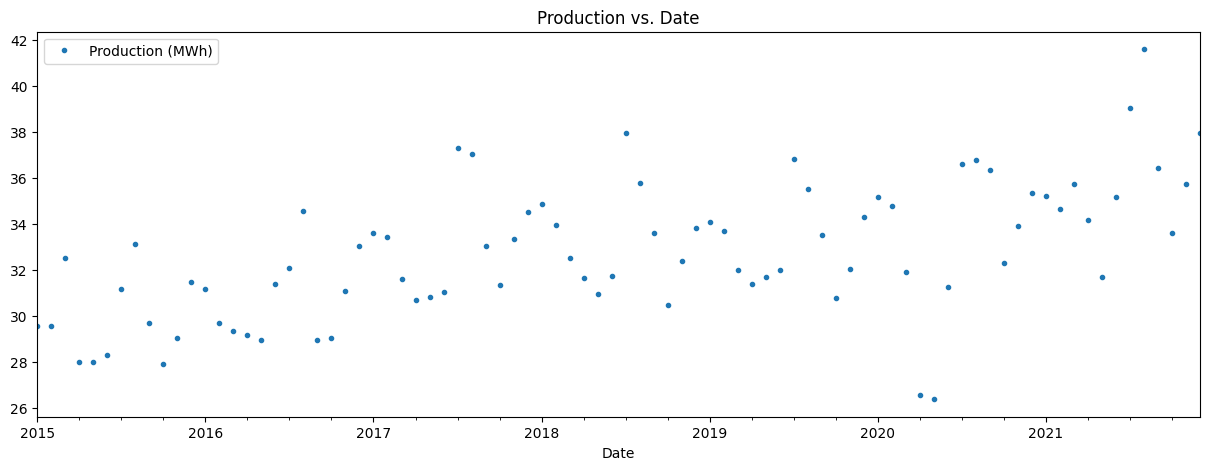

In [28]:
grouped_df2_monthly.set_index('Date').plot(style='.', figsize=(15,5), title='Production vs. Date')
plt.show()

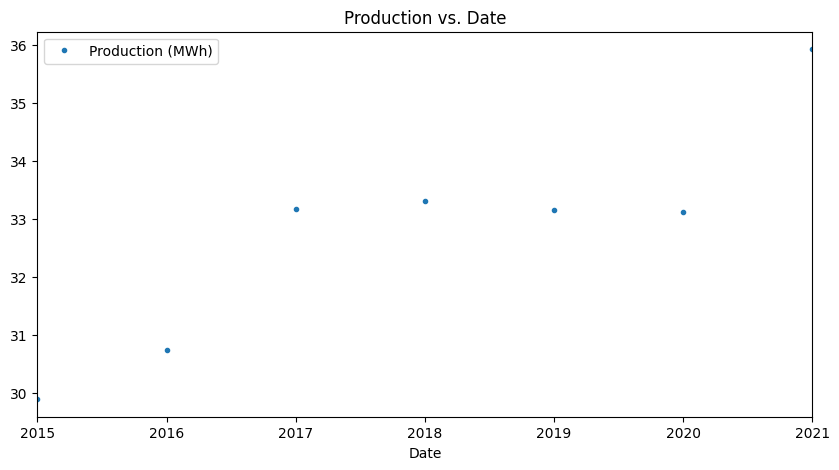

In [29]:
grouped_df2_annual.set_index('Date').plot(style='.', figsize=(10,5), title='Production vs. Date')
plt.show()

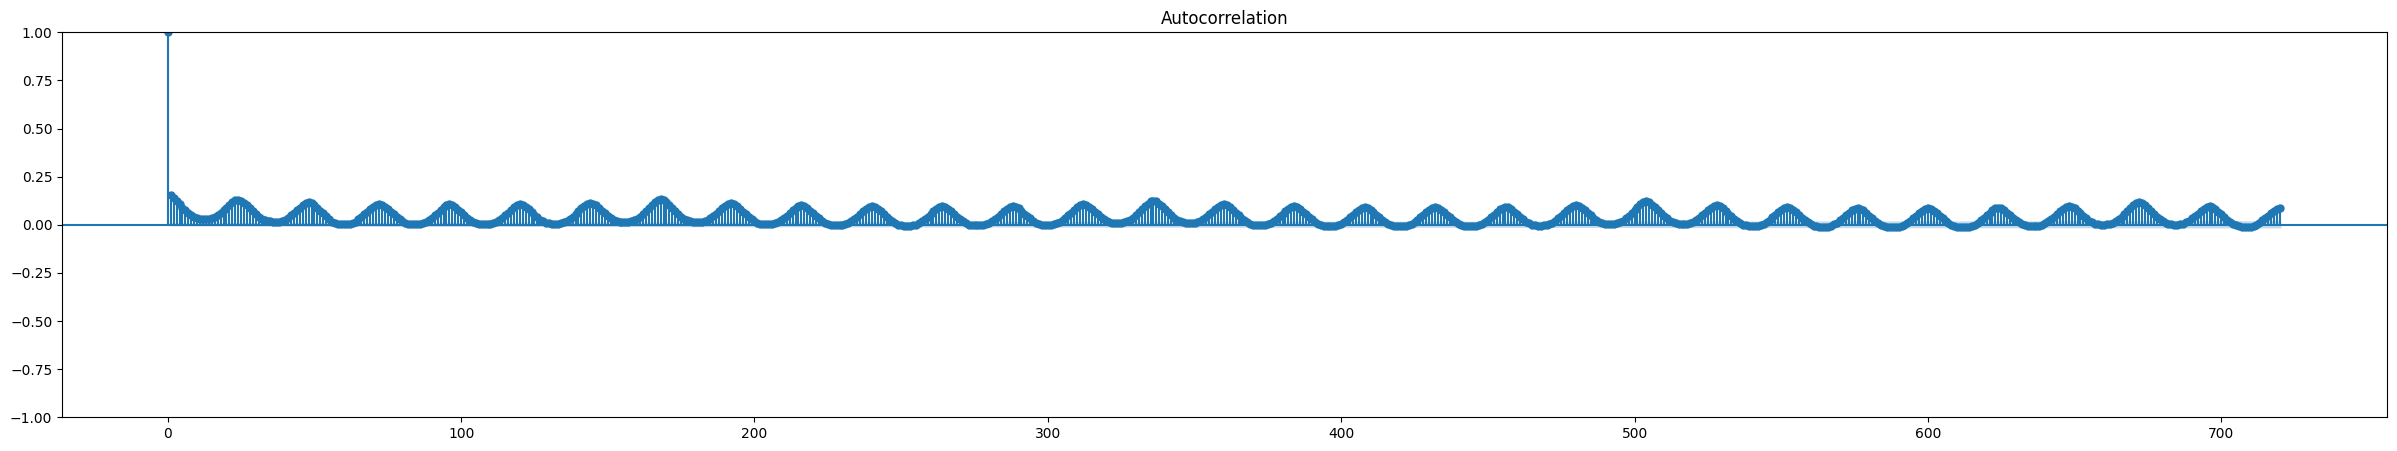

/Users/oyazaimoglu/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


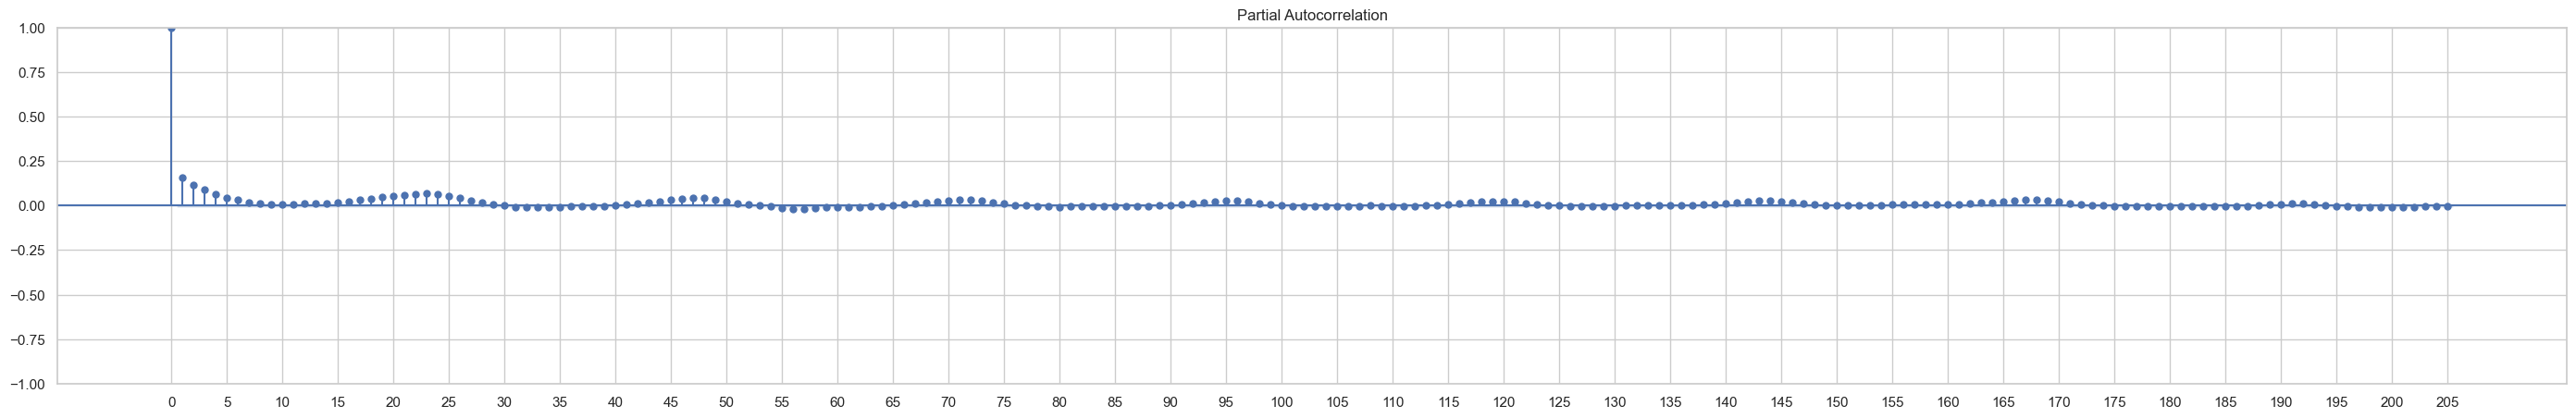

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(30, 5))
plot_acf(df2.set_index('Date'),lags = 720, ax=ax)
plt.show()


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(35, 5))
plot_pacf(df2.set_index('Date'),lags = 205, ax=ax)
plt.xticks(np.arange(0, 210, step=5))
plt.show()

In [31]:
# Forecasting

In [32]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [33]:
print(train_df.shape, test_df.shape) 

(42955, 19) (6137, 19)


In [34]:
y_train = train_df['Production (MWh)'].values
X_train = train_df.drop('Production (MWh)', axis=1).values

y_test = test_df['Production (MWh)'].values
X_test = test_df.drop('Production (MWh)', axis=1).values

In [35]:
!pip install lightgbm

  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      running bdist_wheel
      /Users/oyazaimoglu/opt/miniconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/lightgbm
      copying lightgbm/callback.py -> build/lib/lightgbm
      copying lightgbm/compat.py -> build/lib/lightgbm
      copying lightgbm/plotting.py -> build/lib/lightgbm
      copying lightgbm/__init__.py -> build/lib/lightgbm
      copying lightgbm/engine.py -> build/lib/lightgbm
      copying lightgbm/dask.py -> build/lib/lightgbm
      copying lightgbm/basic.py -> build/lib/ligh

Failed to build lightgbm
  Running setup.py install for lightgbm ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for lightgbm did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      running install
      /Users/oyazaimoglu/opt/miniconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      INFO:LightGBM:Starting to compile the library.
      INFO:LightGBM:Starting to compile with CMake.
      Traceback (most recent call last):
        File "/private/var/folders/72/bdcjdw7170n5n6xnyz6plhfm0000gn/T/pip-install-ebed6vy1/lightgbm_840c77c84d6c4b099b120653cb20c9df/setup.py", line 95, in silent_call
          subprocess.check_call(cmd, stderr=log, stdout=log)
        File "/Users/oyazaimoglu/opt/miniconda3/lib/python3.9/subprocess.py", line 368, in check_call
          retcode = call(*popenarg

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
model_lgbm = LGBMRegressor(objective='rmse', n_estimators=3000, learning_rate=0.01, num_leaves=36, min_child_samples = 15, 
                           n_jobs=-1,  random_state = None, max_depth = 3, reg_lambda = 0.0, reg_alpha = 0.0, min_split_gain=0.0)
eval_set_ALLRESTS = [(X_train, y_train), (X_test, y_test)]
model_lgbm.fit(X_train, y_train, eval_set = eval_set_ALLRESTS ,eval_metric='rmse', early_stopping_rounds=15, verbose=20)

In [ ]:
y_test_lgbm = model_lgbm.predict(X_test)
print("Validation set RMSE (Log): " + str(np.sqrt(mean_squared_error(y_test_lgbm, y_test))))
print("Validation set MAPE (Log): " + str(mean_absolute_percentage_error(y_test, y_test_lgbm)))
print("Validation set RMSE (Non-Log): " + str(np.sqrt(mean_squared_error(np.expm1(y_test_lgbm), np.expm1(y_test)))))
print("Validation set MAPE (Non-Log): " + str(mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_test_lgbm))))
print("% Success (Non-Log): " + str(100 - mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_test_lgbm))))

In [ ]:
from matplotlib import pyplot
# retrieve performance metrics
results = model_lgbm.evals_result_
epochs = len(results['training']['rmse'])
x_axis = range(0, epochs)
# plot MAE
plt.figure(figsize=(17,8))
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Validation')
ax.legend();
pyplot.ylabel('RMSE')
pyplot.xlabel('# of iterations (or # of estimators)')
pyplot.title('LGBM RMSE')
pyplot.show()

## Bring in Final Dataset

In [ ]:
df_final = pd.read_csv('Final Dataset.csv')
df_final

In [ ]:
df_final = df_final[:6]
df_final

In [ ]:
column_headers = list(df_final.columns)
column_headers

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = df_final['Self-sufficiency for Coal']
X = df_final['Energy Poverty (Percent that Cannot Afford to Keep Home Warm)']

In [ ]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

In [ ]:
import seaborn as sns
sns.histplot(model_result.resid);

In [ ]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [ ]:
sns.boxplot(x=model_result.resid, showmeans=True);

In [ ]:
sm.qqplot(model_result.resid, line='s');

In [ ]:
model_result.fittedvalues
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()